# DISASTER TWEETS PREDICTION USING NLP


In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("dataset/train.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df = df.drop("location", axis = 1)
df.dropna(inplace = True)
df = df.drop("id", axis = 1)
df = df.reset_index()
df = df.drop("index", axis = 1)

In [5]:
# as we can see data is pretty evenly distributed
df["target"].value_counts()

0    4323
1    3229
Name: target, dtype: int64

In [6]:
df["text"] = df["keyword"] +" "+df["text"]


In [7]:
df = df.drop("keyword", axis = 1)

In [8]:
df.head()


,text,target
0,ablaze @bbcmtd Wholesale Markets ablaze http:/...,1
1,ablaze We always try to bring the heavy. #meta...,0
2,ablaze #AFRICANBAZE: Breaking news:Nigeria fla...,1
3,ablaze Crying out for more! Set me ablaze,0
4,ablaze On plus side LOOK AT THE SKY LAST NIGHT...,0


### TEXT PREPROCESSING

In [9]:
df.head()

,text,target
0,ablaze @bbcmtd Wholesale Markets ablaze http:/...,1
1,ablaze We always try to bring the heavy. #meta...,0
2,ablaze #AFRICANBAZE: Breaking news:Nigeria fla...,1
3,ablaze Crying out for more! Set me ablaze,0
4,ablaze On plus side LOOK AT THE SKY LAST NIGHT...,0


In [10]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
ps = PorterStemmer()

In [12]:
corpus = []

In [13]:
for i in range(len(df['text'])):
    # removing the hyperlinks in text
    reviews = df['text'][i].split()
    for j, hyperlink in enumerate(reviews):
        if hyperlink.startswith('http'):
            reviews.pop(j)
    
    reviews = " ".join(reviews)
    #removing special characters, numerical values and white spaces from text
    reviews = re.sub('[^a-zA-Z]', " ", reviews)
    reviews = re.sub(' +', " ", reviews)
    reviews = reviews.lower()
    
    reviews = reviews.split()
    # stemming and removing stop words
    reviews = [ps.stem(words) for words in reviews if not words in stopwords.words("english")]
    reviews = " ".join(reviews)
    print(reviews)
    corpus.append(reviews)

ablaz bbcmtd wholesal market ablaz
ablaz alway tri bring heavi metal rt
ablaz africanbaz break news nigeria flag set ablaz aba
ablaz cri set ablaz
ablaz plu side look sky last night ablaz
ablaz phdsquar mufc built much hype around new acquisit doubt set epl ablaz season
ablaz inec offic abia set ablaz
ablaz barbado bridgetown jamaica two car set ablaz santa cruz head st elizabeth polic superintend
ablaz ablaz lord
ablaz check http co tj zjin http co lxtjc kl nsfw
ablaz outsid ablaz aliv dead insid
ablaz awesom time visit cfc head offic ancop site ablaz thank tita vida take care us
ablaz soooo pump ablaz southridgelif
ablaz want set chicago ablaz preach hotel
ablaz gain follow last week know stat grow
ablaz west burn thousand wildfir ablaz california alon
ablaz build perfect tracklist life leav street ablaz
ablaz check http co tj zjin http co lxtjc kl nsfw
ablaz first night retain quit weird better get use wear everi singl night next year least
ablaz deputi man shot brighton home set ab

airplan accid nicol fletcher one victim crash airplan time ago accid left littl bit trauma although
airplan accid omg horribl accid man die wing airplan
airplan accid omg believ rip bro airplan accid jetengin turbojet bo g
airplan accid expert franc begin examin airplan debri found reunion island french air accid expert wednesday began examin
airplan accid airplan accid
airplan accid phone look like car ship airplan accid terribl
airplan accid statist risk get kill cop die airplan accid
airplan accid airplan crash hous colombia peopl die accid
airplan accid shoot airplan accid
airplan accid could drone caus airplan accid pilot worri use drone esp close vicin airport
ambul earli wake call sister beg come amp ride w ambul hospit rodkiai
ambul twelv fear kill pakistani air ambul helicopt crash
ambul two air ambul scene seriou crash two car lorri http co fntg rnkx emsn
ambul twelv fear kill pakistani air ambul helicopt crash reuter yugvani
ambul lead emerg servic boss welcom new ambul char

apocalyps begin day one snow apocalyps
apocalyps rt mother mari short read apocalyps spirit angel took top enorm high mountain
apocalyps candylit imagin sarumi zombi apocalyps fight back back heart heart convers
apocalyps rt zonewolf like youtub video minecraft night lucki block mod bob apocalyps wither amp mo
apocalyps planet lone audienc apocalyps
apocalyps dad bought dvd look like scienc doc front read back actual impend biblic apocalyps
apocalyps alexandrapullin inde apocalyps come week know
apocalyps go look grizzli peak right look like begin dystopian apocalyps movi
apocalyps niec ask would scare apocalyps
apocalyps storm cairo latest x men apocalyps set photo via yahootv
apocalyps minecraft night lucki block mod bob apocalyps wither amp mod showcas popularmmo via youtub
apocalyps shot heart xv go total give love bad name heart pierc http co ejdhvlkxaf
apocalyps rt geek apocalyps pm gmt hess play dark soul day http co imzlnzltf etcpb
apocalyps know go zombi take
apocalyps latest 

arson tennesse lesbian coupl fake hate crime destroy home arson lesbian
arson arson suspect link fire caught northern california lo angel time
arson arson suspect link fire caught northern california
arsonist dc cloudi goldrush hate white peopl mo
arsonist nowplay arsonist mc impress arsonistmus
arsonist alleg east bay serial arsonist arrest
arsonist safyuan minor citat posses decrimin substanc im face time
arsonist suspect serial arsonist arrest calif
arsonist arson suspect link fire caught northern california
arsonist local arsonist diamorfiend legal system never forget
arsonist casper rmg u dick
arsonist bloor ossington arsonist also burn mattress northumberland st cbcto
arsonist arsonist
arsonist anyth nice say come sit
arsonist vegetarian vegan video show arsonist torch popular bk restaur strictli vegetarian govegan uniteblu
arsonist arsonist arrest set mani fire watch tonight headlin nightbeat veronicadlcruz minutemix
arsonist video captur man remov american flag long beach ca ho

avalanch funkflex yo flex im
avalanch avalanch one world away make believ wide awak
avalanch possibl new jersey avalanch next year
avalanch feat watch bt kallemattson incred music video avalanch
avalanch avalanch citi sunset nowplay listen radio
avalanch chevrolet avalanch lt lt use l v v automat wd pickup truck premium b http co dxirntdsrd
avalanch snowflak avalanch ever feel respons
battl star war power jedi collect battl droid hasbro full read ebay http co fegu hwmc
battl civil war gener battl bull run hero colonel nd new hampshir letter sign http co zarbwep ld
battl dragon ball z battl god rotten tomato via rottentomato
battl ad video youtub playlist world tank battl assist mod bat chat arti kaboom
battl ya boy clip vs ku full battl moferadio heavybag battl dom qotr battlerapchri hugh
battl inde fulli awar battl support fight
battl baaaack petersen bowhunt battl bow make sure head cast vote
battl tb throwback want battl war
battl kelbi tomlinson mild manner nd baseman great metropo

blaze properti loss california wildfir nearli doubl week old blaze rage
blaze break firefight battl blaze east cari condo build
blaze nigga love hate
blaze audacityjamesta like babe lt ball fun lan
blaze like youtub video iamrrsb minecraft skywar blaze que usa hack e flechada sinistra
blaze dem blaze cover month ago chicago polic detain thousand black american interrog facil
blaze yo got bar even rapper
blaze ugh blaze put calori pizza ok cool thisispublichealth
blaze pic blaze fort kid look like jackass stuffin face like
blaze look like year write comput ahead
blaze beauti juic let know
blaze babysweet mad name amp blaze
blaze guiltygearxxacp yeah know blaze blue dont twitter lol drew week ago
blaze socialmedia news new facebook page featur seek help person custom experi
blaze djjohnblaz shout blaze hottest dj sothwest
blaze like youtub video minecraft episod blaze farm begin
blaze properti loss california wildfir nearli doubl week old blaze rage fire
blaze christycroley work yet see 

blight willhillbet doubl result live app
blight parksboardfact first zippolin one want use commun never ask blight park moveit
blight look polici matter ohio report cle cuyahoga counti blight green vacant land soon
blight anellatulip put taint magist open gate let blight get away
blight anellatulip theori make way much sens say dwarv may actual origin blight
blight palestinian refuge tragedi blight human amp shame everi isra live
blight articl michael jackman metro time detroit group later downgrad estim squar mile
blight locksmith art respect elabor blight lock lpdkl
blight jake blight wealilknowa cunt
blizzard everi win rank play gave special card back would cool long te
blizzard amazon deal wait buy
blizzard new print avail wait long pamela blizzard
blizzard blizzard draco give free art kamon
blizzard stevenontwatt pussyxdestroy order blizzard pay put nut say ball flavor boom free ice cream
blizzard blizzard auz pm cst radioriffrock hr rock make hump day complet
blizzard realli want

blown thebriankraus leo ass got metaphor blown piperwearsthep charm
blown anarch teapot boironusa zeno glononium c also help blown bash bottl nitroglycerin book
bodi bag new ladi shoulder tote handbag women cross bodi bag faux leather fashion purs full http co zbhvdcxz
bodi bag new ladi shoulder tote handbag women cross bodi bag faux leather fashion purs full http co ddr zjxvqn
bodi bag son daughter would like see go war iran come back bodi bag let republican know
bodi bag questergirl ditto way feel drank vodka ice would bodi bag
bodi bag handbag genuin mulberri antoni cross bodi messeng bag dark oak soft buffalo leather end date w
bodi bag loui vuitton monogram sophi limit edit clutch cross bodi bag full read ebay http co lin kvzbn
bodi bag loui vuitton monogram sophi limit edit clutch cross bodi bag full read ebay http co nlfr xqm
bodi bag loui vuitton cultsierr monogram shoulder bag cross bodi bag http co sslt esmhi
bodi bag check ameribag healthi back bag shoulder cross bodi backpa

bomb af comment new evid japan effort build atom bomb end wwii
bomb bomb ass firework pictur
bomb hiroshima prepar rememb day bomb drop
bomb guardian view hiroshima legaci still shadow bomb editori world long ca
bomb namjoon fantast bomb bye omg
bomb halsey troy collab would bomb
bomb aaronthefm guy scare show real name anyway know bomb
bomb cranboonitz go make bomb threat hereticofeth
bomb dylanmcclur work zumiez locat
bomb new document found point japan wwii atom bomb program
bomb jen da bomb girl
bomb daniglasgow happi birthday big miss girl hope bomb one
bomb smallforestelf umm gun stop gunman carri bomb
bomb danielsahyouni bomb u guy
bomb new document found point japan wwii atom bomb program
bomb hiroshima mark year sinc bomb
bomb crew enolagay nuclear bomb board disarm min hiroshima got readi arm littl boy
bomb dopeitsv ahh bomb babi
bomb get bomb ass pictur mail
bomb fall men god praiz bomb well av alway known dat sinc bigger u pray sir
bomb came idea fragranc concept bath bomb 

bridg collaps two crane restor bridg central dutch town alphen aan den rijn collaps build rescuer search
bridg collaps leicest merc icymi ash australia collaps trent bridg twitter rea http co fcljed
bridg collaps two giant crane hold bridg collaps nearbi home
bridg collaps us wont upgrad infrastructur bad situat go get ugli quickli usa sustain
bridg collaps marshal plan unit state dambisa moyo via prosyn ope via po st
bridg collaps ameenshaikh sir want make point sureshpprabhu made said lie bridg collaps
build burn sonofliberti illumin brightli burn build around town
build burn gemini children scream build burn polic siren distanc
build burn mmmmmm burn burn build build oooooohhhh oooh ooh
build burn dougmartin fireman ed run burn build other run doug deserv respect
build burn themagickidrap upset ralli upset burn build busi execut cop noth etc
build burn kou like cash regist build burn
build burn minimehh cjoyner must overlook burn build blacklivesmatt
build burn fewmoretweet live mat

burn bore life get everi morn burn desir thing enough goal lou holtz
burn hand burn
burn uhhhhh demon hunter whole burn crusad v thing
burn play boat club memori london burn web radio
burn nagel ashley vicken basedlarock goonc ty rip world burn
burn rubi mani stack burn appli
burn parent take kid burn man one year old think better
burn michael so haha would say hot ball burn
burn put fire still burn
burn x counter act burn alexandrian librari
burn california burn gov jerri brown told report press confer california experienc
burn pay attent influenc burn money socialtim
burn minsuwoong complet understand woke like minut ago im burn
burn ika tune soup diet recip fat burn soup recip fat burn soup diet recip
burn burn man ticket vehicl pass full read ebay http co juiit yfvo
burn last day summer suppos fun fun accident burn arm hair play w lighter
burn build kill black babi plan parenthood demonstr loot pp burn build black babi live matter
burn build mmmmmm burn burn build build oooooohhhh 

casualti thomashcrown grandfath set first group marin hit japan oper olymp casualti rate predict
casualti st qualiti insur group hire licens properti amp casualti insur agent produc job denver
casualti becom anoth casualti societi
casualti benzema increasingli look casualti benitez new look squad arsen bound chanc think
casualti want gritti real casualti photo pasta thursday amico tag us amicospizzato seeyouatamico
casualti casualti team ice cream recal send chill food industri
casualti unpredict disconnect social casualti favorit peopl like
casualti northbayhealth trauma center shine respons multi casualti crash http co wbcb sytj
casualti scriptettesar katiecool btw th actual next year casualti began th septemb mark year
casualti avbronstein popehat instapundit kurtschlicht also awar casualti estim invas japan home island
casualti watch home alon without tell kid use casualti homealon film
casualti best special report metric correl best properti casualti marketwatch
casualti took way 

chemic emerg plan case pool chemic emerg learn watersafeti cdc
chemic emerg pjcoyl need includ emerg plan chemic plant see also
chemic emerg emerg unit simul chemic explos nu suppos student research lab northwestern
chemic emerg know bad bee give pressur short term profit obsess chemic compani
chemic emerg nueva favorita emerg feat chemic brother bit deezercolombia
chemic emerg downtown emerg servic center hire chemic depend counselor intern appli seattl job
chemic emerg emerg unit simul chemic explos nu suppos student research lab northwestern
chemic emerg chemic spill cleanup video prepar emerg situat lab
chemic emerg downtown emerg servic center hire chemic depend counselor intern seattl appli job
chemic emerg day liquid emerg chemic object usar usar ruor
chemic emerg emerg unit simul chemic explos nu evanston
chemic emerg pleas stand bee profit hungri chemic compani keep ban amp savebe sign petit
chemic emerg laevantin fortun rework plumb emerg chemic shower draw glitter pipe occas

collid step outsid drink cigarett immedi lock eye jogger world realli collid
collid alway super awkward world collid
collid ef star war star trek collid pluto moon charon pluto
collid high fashion food collid gucci chosen one shanghai popular commerci avenu fashion
collid sound right build thunderstorm insid one day air mass collid
collid rememb us drive sing collid togeth
collid let collid until fill space
collid student collid fri sat regist nlccollid
collid wanna touchdown wanna make world collid
collid madisonpa love amp wait collid
collid pierc veil rubber bracelet wristband collid sky full read ebay http co inezza
collid soultech collid club mix
collid like youtub video gassymexican realiti collid life strang hilari glitch
collid mattcohen fake gamma ray januari world collid wait wave past perfect reunion lucki cool come hot time
collid witch glass castl supernatur ya sibl rivalri magic love collid wogc kindl
collid mayb star align mayb world collid
collid check new song collid l

crash destinythegam bungi playstat get kick crash one worst experi play video game
crash chelsdelong kendra leigh crash
crash pleas keep josh salyer blair hall famili amp jenna friend prayer taken far soon rip
crash one night gonna come crash parti invit feelin
crash fatal crash report john island
crash photoshop tool crash cours complet photoshop tool guid cours
crash photoshop cs crash cours cours
crash kinet typographi crash cours effect video cours
crash polic respond crash find suspect heroin
crash see dat liabl fuck crash
crash akilah world news cop pull man car avoid
crash man kill crash barrington hill hoffman estat man kill singl car crash wednesday aft
crash crash helmet silveri floor karnal fat shoot sampl pbcanpcx
crash crash test trailer paul scheer amp rob huebel comedi special record
crash spicybread coxytown tri download crash tutori
crash maj muzzamil pilot offr mi crash near mansehra today
crash bin laden famili plane crash avoid microlight landi peritoengrafoscopia
c

curfew begin summer mom made curfew back never go wonder alway home
curfew charli lim start pm sunday curfew leh
curfew u bomb u tri get home curfew
cyclon awwww babi walter rewatchingthepilot teamscorpion cyclon
cyclon big ten annual footbal media day get cyclon hoop recruit nugget
cyclon camera art photographi new bolt cyclon dr pp dr dual outlet power pack extern camera flash
cyclon mccauleysdesign abysmaljoin dyamiplotk work purpos larg cyclon would better k
cyclon new tropic cyclon form near guam form call molav
cyclon video new de jhaustin thoma cyclon ame tribun ame tribun video new de jhaustin thoma
cyclon xhnew need plant pacif cyclon season would help
cyclon bbc forc retract fals claim cyclon pam via wordpressdotcom
cyclon great condit easton cyclon softbal bat fastpitch sk http co ghhyk b
cyclon sever weather bulletin typhoon hannaph soudelor tropic cyclon warn issu pm
cyclon cyclon deriv power calm center person norman vincent peal
cyclon roughdeal ant hudhud cyclon chandra

dead gailsimon iwasdisappointedbi telltal walk dead good charact amp stori real gameplay mani perform issu
dead beforeitsnew hundr fear dead libyan migrant boat capsiz rescu http co fven ex ps
dead war came see never see wave white flag front end dead wont misl
dead jone kyle oh fuck sake dead
dead emmerdal ross realli dead askcharley
dead avoid wear dead black flame red stark white much esp debat go blue gold brown even shoe
dead perspect grate dead critic write contribut studi http co aggryhvxkr
dead hlportal hello look mod cold ice saw site link download dead mayb share thank
dead kg vaal lmaov v hard ny new trend babalmao welcom nyozi kwaaaaa dead
dead jone kyle said dead one els die
dead ross dead noooooooooooo mikeparractor
dead think time friend bail nite b dead show went alon amp great time alon free danc front row
dead typhoon soudelor take dead aim taiwan
dead askcharley emmerdal emot ross dead emmerdal
dead man found dead demi moor swim pool
dead val dead im su
dead atchison

debri aircraft debri confirm mh nation star onlin
delug dustpiggi ah awash abstract dustpig tweet explain delug
delug xeni bet mother natur might plan send delug way
delug joshsternberg feed seem delug twice week fantast
delug romeocrow welcom organ twitter find import stuff amongst delug btw love music sign ep
delug niagara fall packag deal delug tour yyeso
delug apologis sincer inevit delug gbbo tweet come hold grudg decid unfollow bake cake
delug rt nlm dimrc delug resourc flood medic provid cleanup worker amp
delug towboat trek sympathi delug fall vtc
delug delug eulog cecilthelion whatsapp gt gt torment soul matia xavier
delug wa smile juli delug west australian via yahoo
delug china delay delug fundament economi support valuat stock
delug despit delug fantasticfour notic man cuana still buy ticket bloodi mind like
delug photo forrestmankin colorado camp
delug delug troi rivier one hour get legionstrackandfield
delug mani half nake men twitter tonight normal embrac odd torso scale

demolish home suit offic come salvi bistro site former salvi bistro soon demolish make
demolish bbsnew latest palestin amp israel six palestinian kidnap west bank hebron home demolish
demolish david fernandez theblaz trump get absolut demolish gener elect
demolish final demolish spring properti sat vacant sinc saddlebrook
demolish stallion kbeastx total demolish genisi beauti film almost peopl agre
demolish danger properti downtown phoenix demolish
demolish demolish person best
demolish year old ring fort demolish
demolish jackmulholland think also becam marqui carlo amp charli final dublin sadli demolish
demolish demolish palestinian villag come back life
demolish three home demolish unrecogn arab villag intern middl east media center
demolit epa begin demolit home toxic area buffalo
demolit davidvonderhaar love even littl youd put demolit bo
demolit draw day demolit daili footbal select servic consist make money lay yo http co tegajmr il
demolit demolit amp still fire freestyl ever
d

derail derail benchmark cool path wonder run find leak job given resqu
derail gerryconnolli repdonbey timkain today metro commut debacl w derail non passeng train show clearli need rail mgr ceo
derail ohyayyyyay train derail morn
derail madhya pradesh train derail villag youth save mani live
derail servic green line resum earlier derail near garfield residu delay
derail madhya pradesh train derail villag youth save mani live
derail death railway track rain cannot take blame derail common last year less th
derail news madhya pradesh train derail villag youth save mani live til ndtv
derail mp train derail freakiest freak accid mp train derail freakiest
derail teamfollowback madhya pradesh train derail villag youth save mani live followback
derail modiministri madhya pradesh train derail villag youth save mani live
derail still box alarm train derail st calumet struck order chicagoscann
derail consent order cleanup underway csx derail site knoxvil news sentinel http co nmfsgkf za
derail m

destroy petchari say either us displeas u move five spot jamaica congrat reggaeboyz
destroy cameronciletti tigersjostun destroy u
destroy wow crackdown use multipl server multiplay u destroy whole build cop
destroy get eur free bet bwin use sport market destroy free http co jfyfzddlrn
destroy sarniamakchri hromadsk kasiadear silli one two countri destroy world say world secur
destroy destroy reg c competit entir region b satur ye brockton get regc commonwealth ppc
destroy let other bring matter hard tri beconfid let other destroy weak
destroy let destroy twitter fouseytub zaynmalik come brbr let morn fousey
destroy friend could destroy hour lmao
destroy industri tryna destroy meekmil caus expos cash cow
destroy sj gist hous farm produc destroy streetjamzdotnet
destroy destroy hous
destroy twitter destroy childhood
destroy msmigot wow convinc amp compel evid chang view climat chang denier tend destroy give evid
destroy polit preschool attitud russia order destroy food come countri like 

deton deton quot esteem belt quot regard one recent esevu
deton want play game googlemap mashup calcul effect deton nuclear bomb
deton look upon three method touch obta rank electr transcript deton butiqob
deton ignit knock deton sensor senso fit bmw ci l l http co c hise r
deton ignit knock deton sensor senso standard ks http co cpmxmurk
deton ignit knock deton sensor knock sensor delphi http co wadnmstov
deton ignit knock deton sensor connector connecto motorcraft wpt http co bxalnedi
deton ignit knock deton sensor senso beck arnley http co gaheujruju
deton deton realist asset enter india koz
deton new smp ignit knock deton sensor ks http co ljntejgmb
deton ignit knock deton sensor senso standard ks http co fvzsgjtbew
deton new fashion ladi gold watch waterproof weiqin famou brand michel quartz de lujo ca http co tzeyhfn
deton ignit knock deton sensor senso beck arnley http co lw kdk
deton ignit knock deton sensor acdelco gm origin equip http co saohvjktqc
deton new favorit trivium d

disast rbcinsur quot websit disast tri browser amp machin alway get miss info error due non exist drop
disast like think photogen everi time see pic think gosh disast xd
disast disast avert polic kill gunman hoax devic cinema
disast disast avert polic kill gunman hoax devic cinema
disast lock pitch playoff disast absolut posit never let pitch sixth inning
disast teen disast prepared event van nuy august pm via vannuyscouncil
disast youssefyamani add fez weather equat best recip disast
displac myanmar displac rohingya sittw point return prison like condit genocid ihhen msf refuge
displac crew day board window park galleria apt fire displac
displac potu strategicpati strategi genocid refuge idp intern displac peopl horror etc
displac dead injur displac syria visit us canada
displac myanmar displac rohingya sittw point return prison like conditionspriv
displac lizhphoto much shit go head rather talk outburst displac aggress sux
displac kca votejkt id news updat famili displac fire damag h

drown vist georgina drown rat cafe aw view
drown sometim logic get drown emot gotta surfac point
drown itsdani noooo almost drown tho
drown toddler drown bath mum left room fetch pyjama
drown pick ground swam drown hit bottom hard bounc twice suffic time around differ
drown thank uplift spirit im drown anchor
drown want see austinpearci bad even funni probabl cri drown kiss
drown jacksonvil famili band togeth memori plan
drown hundr fear drown anoth mediterranean asylum seeker boat sink
drown got drown like time damn game today
drown ton cocain worth million dollar drown alameda american drought coke
drown nigga favorit question singl bitch know pussi wet almost drown nigga
drown best thing drown call guy angri caus gotten track number
drown hundr fear drown migrant boat capsiz libya
drown today fell rock scrape whole butt nearli drown summer k
drown hundr migrant fear drown libya migrant stand next tent camp set near calai
drown hope drown eeasterl
drown dinosaurdracula felt remors mi

electrocut kid got disney version game oper aa batteri swear old version like ds would nearli electrocut
electrocut elecman could electrocut say thank
electrocut got extens cord extend bed bath tub let pray electrocut
electrocut wanna tweet niall thx make electrocut tweet scare jinx
electrocut wtf thoma edison make lightbulb use electrocut anim make everyon think tesla power unsaf wank
electrocut achiev unlock replac light socket electrocut self
electrocut electrocut
electrocut electrocut turn
electrocut zxatheti okay electrocut badli right
electrocut sea electrocut us
electrocut electr vs ga brew want electrocut question
electrocut danisnotonfir let phil help probabl electrocut
electrocut mmchale tri electrocut self phone cord
electrocut mom friend still see friend littl babi care els electrocut
electrocut phone electrocut charg
electrocut say love come help sea would electrocut us
electrocut freez room amp eral want unplug ac want electrocut myelf die
electrocut need u delet start cr

emerg plan base georgi yo forreal need like emerg action plan incas donald trump becom presid whipe lil babi
emerg plan rebeccaforr accept wisconsin emerg respons plan behalf govwalk nbc
emerg plan cruis emerg plan awesom fail
emerg plan practic famili fire escap plan everyon know case emerg
emerg plan biztip recommend busi get altern sourc electr solar wind batteri emerg plan
emerg plan bodi like go fuck sleep sami mind like make emerg plan everi natur disast go
emerg plan plan emerg prepared famili children special need autism specialne
emerg plan senat call emerg hous boxer feinstein back plan move homeless vet va campu
emerg plan sever thunderstorm warn remain cochran cityofcalgari enact municip emerg plan today storm abstorm
emerg plan fix stupid mt cbccalgari drive flood underpass warn citi enact municip emerg plan yyc abstorm
emerg plan emerg drink water plan download guid english spanish french arab vietnames
emerg plan big issu left undon get home advers weather hit gotriangl 

evacu pl alllll nitti evacu stockwel
evacu cancel fuck show evacu metlif
evacu condemn clearli replac latest respons aimlessli dryer evacu deters de hlg
evacu efak would design build occup evacu report evacu assembl site
evacu jay alexi broke goe faith goal peopl evacu
evacu joonma dealbreak dealbreak abandon ship evacu build
evacu store fire alarm went today work evacu like omg happen
evacu loui sad cancel show everyon leav evacu cannot go
evacu evacu student throw dungeon stupid
evacu u also flew bomb site world war ii warn letter tell peopl evacu
evacu mygc broken powerlin evacu gold coast tram suspend servic
evacu sooo polic dispatch said person threaten shoot walmart rutherford amp evacu
evacu summer program work went citi pool evacu one kid left surpris jimmyfallon worstsummerjob
evacu us govt refus evacu american yemen yemen usa evacu abandon
evacu ahhtheenikki tell respond today gunman quickli abl evacu ppl one shot
evacu second bitch evacu
evacu california wildfir forc thousan

explod tag attackonstil million punk hang em high alpha dog yeah boy doll face littl white lie explod
explod learn gain access secret top earner amp use explod home busi pleas rt
explod want fuck duck explod could greasi
explod peopl explod
explod learn gain access secret top earner amp use explod home busi pleas rt
explod anonchimp think tie thunderstorm tho make soul explod
explod head gonna explod
explod readi explod
explod deldryden press twitch head explod
explod toronto go crazi blue jay imagin leaf get good citi might liter explod
explod chick masturb guy get explod face gt
explod crimsonfuckingv bitchl vecannon even admit sera sasha cute peic ass explod sidewalk
explod kakeru teduka bfore year today hiroshima explod one atom bomd sad day http co vzl ns io
explod tin tesco dog food explod prompt complaint via chelsea dog pet dog anim puppi
explod kopiteluk broken fulli explod
explod im dead two love photo heart explod million piec brandonskei samsmithworld
explod dress meme offi

famin ppl like unu feast today famin tomorrow
famin top turn dark king redeem queen seren famin wolf
famin russian food crematoria provok outrag amid crisi famin memori
famin robertmey exampl low food price caus farmer go broke famin next year mean simpl capit fail feed peopl gt
famin memori million perish holodomor erect u capit http co mxxkzhbl
famin export food wont solv problem african end famin n poverti solv control tribal war
famin food crematoria provok outrag amid crisi famin memori
famin new articl russian food crematoria provok outrag amid crisi famin memori read
famin build muscl feast famin feed diet plan base around lose weight
famin famin come end bluebel
famin tast like feast famin starv trust jack write coffe iartg rwa tw rw rrbc
famin russian food crematoria provok outrag amid crisi famin memori
famin russia destroy food peopl go hungri one insan govern
famin financialtim ethiopian regim continu receiv foreign aid famin struck year eastern ethiopia
famin reuter russia

fatal wow fatal big rig hit motorcyclist blood everywher wow sick
fatal tellyfckngo jaycootchi nah hit homi wit fatal son wit babal cold cold fuck lmfaoooo
fatal kosciusko polic investig pedestrian fatal hit train thursday
fatal fatal
fatal bardissimo ye life fatal rate
fatal mani basket charm fatal tonyakapp get mysteri paranorm
fatal make bad boy must see
fatal fatal us need team need one
fatal afghan soldier kill us gener america highest rank fatal sinc vietnam
fatal usual never happen
fatal babybackreev fatal
fatal cat fatal utica ny pleasant amp holland ave black cat white paw averag size grass next north side road
fatal pxnatosil renunciedilma fatal
fatal jax mk stage fatal uud lk close
fatal see video everi fatal mileena make sad
fatal chrisman fatal
fatal kosciusko polic investig pedestrian fatal hit train thursday
fatal fatal
fatal fatal scari af probabl best falcon still scari
fatal like youtub video vgbootcamp x sn vabeng zss vs sw fatal captain falcon
fatal truck crash w us

first respond cool teen becom like call digit first respond friend need littl help support
first respond carmik cinema antioch shoot grate staff first respond safeti highest prioriti
first respond rt roadid thank alex stori amp first respond need
first respond ad sandi first respond lost home vip home page group vimeo
first respond thank first respond especi mnpdnashvil life save respons today antioch
first respond juneau empir first respond turn nation night
first respond red throw word hero around lightli usual reserv first respond militari hero
first respond us want futur first respond high tech
first respond still room parti first respond around countri rd annual best ever
first respond incas accid first respond would know babi present
first respond kirsten gillibrand extend health care first respond
first respond help say denver firefight work curb first respond suicid
first respond first respond conven nation summit award gi technolog gisuserpr geotech
first respond york co first

flood spot flood combo inch w curv cree led work light bar x offroad fog lamp full http co zo px p v
flood spot flood combo inch w curv cree led work light bar x offroad fog lamp full http co xy iejj
flood spot flood combo inch w curv cree led work light bar x offroad fog lamp full http co uvmq vafq
flood flood advisori issu august pm edt nw wxki
flood surviv plagu float flood peek head mud one immun deafen bell god surviv
flood spot flood combo inch w curv cree led work light bar x offroad fog lamp full http co vwykdau vm
flood flood prone waterway westchest counti elig million state aid newyork
flood chines rescu team arriv myanmar help flood victim sittway
flood flood advisori issu august pm cdt august pm cdt nw urban weather
flood w cree led work light bar alloy spot flood combo dive offroad wd boat full read http co adx iyi
flood rock spring resid live elk street continu battl flood issu monday rain storm
flood cuban leader extend sympathi vietnam flood
flood busi spong dock wash 

forest fire tale tree deep water love lake taho forest fire
forest fire p progress made bois forest fire http co wtpo elrzd
forest fire group florida forest servic firefight could deploy california help contain fire detail
forest fire pray east coast forest fire pray put pray rain
forest fire bluejay brave angel instead dump water pleas send british columbia help forest fire
forest fire heartdiseas u forest servic say spend half budget fire
forest fire pharrel prevent forest fire
forest fire climat consequ u forest servic say spend half budget fire http co zqbxe x
forest fire u forest servic say spend half budget fire
forest fire properti loss northern california wildfir nearli doubl via yahoonew
forest fire inciweb updat rogu river siskiy nation forest fire pm rogu river siskiy nf area
forest fire forest fire could delay abbyairshow offici say could good thing
forest fire u forest servic say spend half budget fire ian simpson
forest fire campsit recommend toilet shower pub fire kid pi

hazard like youtub video chaboyyhd battlefield funni moment duke hazard undercov soldier
hazard phiddlefac there choke hazard dont die get
hazard road hazard cascad rd sw childress dr sw
hazard road closur remain effect due hazard tree fall tree torch uphil run fire forest servic road remain close
hazard di maria left dear mufc back hazard di maria argument say hazard way better idc
hazard davi drug guid nurs judith hopfer deglin april hazard vallerand http co afrhnlli
hazard eden hazard hockey
hazard confirm sanchez hazard bolasi rest season
hazard thatpersianguy youngsaf eden hazard harden spot flop ident
hazard rate hazard highli fanboy among worst account twitter
hazard dannyraynard bad person get rid either hazard aguero better striker berahino
hazard choke hazard prompt recal kraft chees singl
hazard break arsen hector bellerin arrest question regard disappear eden hazard
hazard freak accid sure look someon blame mayb rememb player broke leg cuz cart back end zone common sens
haz

hellfir hellfir even want think mention let anyth lead islam
hellfir new cocktail list el diablo ma verd mezcal yellow chartreus honey cucumb hellfir bitter
hellfir hellfir surround desir care let desir control afterlif islam
hellfir prophet peac upon said save hellfir even give half date chariti
hellfir hellfir even want think mention let anyth lead
hellfir gg keeponrockin strawberrysoryu oh okay got messag twice got suspici sorri check
hellfir allah describ pile wealth think would last forev descript peopl hellfir surah humaza reflect
hellfir hellfir surround desir care let desir control afterlif
hellfir fel lord zakuun die hellfir wod
hellfir hellfir gargoyl hoof coil
hellfir mechamacgyv wow bet got blame huh
hellfir ian hellfir realli idea mani time ignor fadc expect anyth
hellfir prophet peac upon said save hellfir even give half date chariti
hellfir usarmi enter jagm project replac tow hellfir missil check
hellfir hellfir even want think mention let anyth lead islam
hijack tensio

hostag islam state group egypt threaten kill croat hostag
hostag held hostag radic group
hostag u get mug ur gf u come best excus look like bitch want fight held u hostag
hostag shadow holdin hostag day
hostag relat news isi video threaten hostag europ cnn
hostag evahanderek marleyknysh great time bu driver held us hostag mall park lot lmfao
hostag horrif stori hostag horrif stori hostag british
hostag islam state group egypt threaten kill croat hostag
hostag murfreesboro peep hear walmart rutherford lockdown hostag true rumor
hostag islam state group egypt threaten kill croat hostag
hostag sent email trinna hold hostag rap
hostag wtf biolog father hold hostag adopt parent even look crimin mind got fuck
hostag mylittlepwni earli may anathemazhiv tonysando much lebanon attack iran hostag crisi libya pan
hostag fill mind encourag posit take hostag care content
hostag went pick lunch today bartend hold chang hostag want number
hostag pmarca content held hostag network due affili fee
hosta

injur dead dozen injur gaza blast near hous level summer war washington post world
injur dead dozen injur gaza blast near hous level summer war via
injur thehamm tonycotte alsowhat st team player got injur bilic would get slate play themh win
injur udhampur terror attack milit attack polic post spo injur suspect milit tonight attack p
injur golf mcilroy fuel pga specul video injur world number one rori mcilroy fuel speculatio news
injur breakingnew milit attack udhampur polic post spo injur
injur wearethenew pleas support pleas cosponsor support aid sick injur respond renew health
injur well injur pro bowl back
injur udhampur terror attack milit attack polic post spo injur suspect milit tonight attack p
injuri injuri may forgiven forgotten aesop
injuri offici kinesiolog tape ironman long last durabl effect common injuri http co iyuntxduv
injuri tayiorrmad megatronafc possibl injuri ankl though one wors regardless
injuri fact could tag like small creep self inflict injuri skin derma bra

inund megalpoli area pet parti shiver fear instant global inund overflow commenc write
inund zachlow nba reason one constant drake inund extrem annoy drake land us
inund oh boot amp heart social media inund start pleas
inund potenti storm surg flood map nation hurrican center http co ot bjjhh
inund punjab govern flood relief platform realtim inform inund damag rescu effort amp travel alert
inund well unfortun follow stage pic came today advanc apolog inund
inund kathrynschulz plu well inund zone amirit
inund sorri mouss inund fuckin hilari
inund beyond bound till inund rise
inund sprinkler faq lawn inund system answer ebb
landslid kemal atlay caught landslid
landslid sink hole earth slide avalanch gt gt http co xrrlnhelap allah islam sinkhol landslid avalanch usa franc uk usg emsc
landslid martinmj yougov seat major vote becom landslid
landslid hoodedu fuck better berlatski win fuck thing landslid hold person fuck respons
landslid landslid live fleetwood mac nowplay q
landslid armi vet

loud bang sw train strang loud impact bang nois train epsom arriv wimbledon
loud bang jrowah break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang k matako bot break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang peac sit room heard loud bang someth fall
loud bang kijima matako break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang matako break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang morn amp went downstair watch telli amp accident made loud bang amp dad broken leg walk
loud bang ykelquiban break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang toxicsavior loud bang froze spot slowli everi head turn toward one thing hate
loud bang daviesmutia break news unconfirm heard loud bang nearbi appear blast wind neighbour ass
loud bang bang guk like sing loud
loud bang move bang bang rock roll art brut long sinc play one loud art 

massacr gigagil iof murder palestinian children gaza massacr zionist moral zionism world evil
massacr souss beach massacr link tuni museum attack
massacr soap educ sudden massacr deadli long run mark twain
massacr tell barackobama rescind medal honor given us soldier massacr wound knee sign amp rt
massacr nataliealund parent colorado theater shoot victim fear copycat massacr antioch
massacr wkrn parent colorado theater shoot victim fear copycat massacr antioch
massacr martynwait well known fact st valentin day massacr could avoid oompah period tom wait
massacr martyr kept udhampur terrorist bay avert massacr two young sp
massacr creepiest youth camp ever
mayhem beach read august giveaway hop amp stuckinbook give away book mayhem seri
mayhem cvinch waow thank drove mayhem scari staci
mayhem slayer reflect low mayhem festiv attend king diamond amp jeff hanneman pass
mayhem guess ill never abl go mayhem
mayhem like youtub video itsjustinstuart gun rang mayhem
mayhem raynbowaffair editor c

mudslid dorett that name mudslid cake maker
mudslid rt rabidmonkey ah uniqu mudslid cake gbbo
mudslid brobread look like mudslid
mudslid lolli knicker mudslid like chew rubber tyre done vaginaorcak gbbo
mudslid fuck paul say cake look like mudslid tast like rubber
mudslid first impress glad hat man leav lieu interest ladi hope mudslid ladi triumph next week
mudslid hazelannmac ooh feel guilti wish hatman bet mudslid delici
mudslid urufusanragu mudslid
mudslid british bake great pretti hilari moment mudslid
mudslid new hart mudslid nuff said gbbo
mudslid oso washington mudslid respons interview part
mudslid bakeofffriend one mudslid
mudslid call mudslid aw
mudslid mariankey rubber mudslid still laugh
mudslid bakeofffriend gbbo one mudslid guy hat
mudslid bae soak mudslid backroom thisiswhywecanthaveniceth
mudslid cake look like mudslid hah
mudslid first time get gbbo physic gasp cake mudslid incid alreadi way emot invest
mudslid nikistitz even one look like mudslid
natur disast natur di

nuclear reactor salem nuclear reactor shut electr circuit failur pump http co tgdonttkti
nuclear reactor finnish minist fennovoima nuclear reactor go ahead
nuclear reactor aug fort calhoun nuclear station capac today accord nrc
nuclear reactor snowywolf thegreenparti besid would rather shut whole nuclear reactor mainten wind turbin time
nuclear reactor hamptonroadsfor us navi sidelin newest sub http co dhyljllrhl
nuclear reactor year boy scout creat mini nuclear reactor home
obliter dicehatem puppyshogun make sens paper beat rock paper come wood wood abl support obliter rock
obliter peopl republ china proc abandon west philippin sea via changepilipina
obliter realdonaldtrump obliter notion amp pattern polit style seemli lead voter belief sarcasm narciss richhomeydon swag usa like
obliter fun instagram jeb bush said earlier week want obliter plan parenthood bu
obliter souda leav ladi sonia alon shall obliter kneelbot
obliter klavierstuk lvg forc market may beat spur smaller team blind l

oil spill plain calif oil spill could larger estim
oil spill refugio oil spill may costlier bigger project
oil spill refugio oil spill may costlier bigger project
oil spill news refugio oil spill may costlier bigger project
oil spill refugio oil spill may costlier bigger project news
oil spill refugio oil spill may costlier bigger project
oil spill news refugio oil spill may costlier bigger project
oil spill refugio oil spill may costlier bigger project plain american pipelin oil spill
oil spill refugio oil spill may costlier bigger project
oil spill la time refugio oil spill may costlier bigger project
oil spill senat voic concern bp oil spill settlement
oil spill california spring oil spill estim grow associ press via nyt
outbreak famili sue legionnair famili affect fatal outbreak legionnair disea
outbreak famili sue legionnair famili affect fatal outbreak legionnair diseas edinburgh
outbreak famili sue legionnair famili affect fatal outbreak legionnair disea
outbreak legionnair dise

panic panic attack bc enough money drug alcohol want buy year let alon fall bill
panic school today alreadi panic attack thank high school suck
panic panic attack worst
panic panic disco te amo
panick laughtrad panick market see posit capitul joke come may ugli
panick quotesttg save panick get helio
panick dirk nomissski yea someon faint panick that basic stuff
panick okay find kinda panick
panick new post peopl final panick cabl tv
panick hear mumbl hear cackl got em scare shook panick
panick made mood go shitti af panick af istg
panick okay panick
panick idm burn whole gotham citi bc gonna laugh everyon theyr panick
panick certainli ian bartlett great see hs astroturf panick thought cross parti support crumbl
panick new post peopl final panick cabl tv
panick alreadi panick cri bc stress nice
panick peopl final panick cabl tv
panick adumbbb oh bad haha would panick tho
panick beauscoven nah man panick found brother wife debbi hospit stress
panick panick mayb bff left china bar mayb ti

quarantin top link reddit new content polici goe effect mani horribl subreddit ban quarantin
quarantin alabama home quarantin possibl ebola case offici say quarantin place bluehand pjnet
quarantin hm mt ebolatrend alabama home quarantin possibl ebola case http co jliemrsnnj
quarantin go say new reddit polici chang think r conspiraci quarantin bad truth
quarantin okay cat quarantin bathroom meow realli loud turn tv louder thing might work okay
quarantin alabama firefight quarantin possibl ebola exposur report
quarantin npzp mhtw fnet offici alabama home quarantin possibl ebola case abc news
quarantin alabama home quarantin possibl ebola case ambul sat outsid univers alabama
quarantin hot reddit new content polici goe effect mani horribl subreddit ban quarantin prebreak best
quarantin reddit new content polici goe effect mani horribl subreddit ban quarantin http co p rfhx
quarantin hey reddit concept quarantin make sens peopl quarantin wander amp whenev want
quarantin ebola alabama home 

refuge turkish coupl decid feed syrian refuge part wed celebr http co djx elbrv
refuge fadelurk dalinthanelan lt right even two year still refuge camp south redcliff villag aidan gt
refuge newlyw feed thousand syrian refuge instead host banquet wed dinner age news
refuge photo young refuge forc flee burundi violenc vice news see
refuge kristindavi un refuge thank un refuge help mani peopl need world
refuge wowo nigerian refuge repatri cameroon
refuge newlyw feed thousand syrian refuge instead host banquet wed dinner via smh
refuge paci c media centr articl australia rsf protest new secur gag report
refuge recap nigerian refuge repatri cameroon
refuge gener bride earth coupl feed syrian refuge wed day via thedailybeast love
refuge whao nigerian refuge repatri cameroon
refuge return refuge flee amp vietnames govt treat return dutton presser
refuge chpsre rt refuge follow pari visit dream human exhibit rezaphotographi
rescu policyhold object clico rescu plan http co jycpf iyhg
rescu panik

riot eac au pre order film itun amp watch yay http co bwdhibtik
riot without alli near use skill get hire realli caus make everi riot staff member look incompet
riot pop quiz prefer feminist revolut fri ravioli porcini ricotta http co oinfgxyx
riot meat love feminist world riot grill arriv oliviamil
riot davidjordan stephanenni except know start riot even make sens credit particular individu
riot trollkratto juan carlo salvador secret tip get riot point lol check secret bio
riot southeast dirt riot seri crown champion southeast dirt riot seri crown championsblackfoot id
riot sweetpea run riot allot brighten raini day
riot stuart broad take eight joe root run riot aussi
riot riot polic interven southampton vitess arnhem support clash fan clash buildup second
riot jwalkerlyl discov nickcannon listen buy realmandyrain riot itunesmus itun blowmandyup
riot cracker white riot nowplay
riot govern care polic stop riot eventu protestor eventu skyscrap becom plant cover
riot new doco tonight pm 

sandstorm watch airport get swallow sandstorm minut
sandstorm watch airport get swallow sandstorm minut
sandstorm watch airport get swallow sandstorm minut
sandstorm come sandstorm tryout aug th lower woodland ms tryout pm hs tryout pm
sandstorm watch airport get swallow sandstorm minut
sandstorm villicanaalicia darud sandstorm
sandstorm listen darud sandstorm without expect airhorn
sandstorm play darud sandstorm radio edit http co padosfyxnm
sandstorm watch airport get swallow sandstorm minut
scream slam phone ground scream ahahahga
scream infinitegrac scream world much love littl poni
scream updat polic seem like nice enough peopl felt bad transform scream worri unconsci
scream someon gonna get scream get lyric wrong lmao
scream scream sidjsjdjekdjskdjd cant stand
scream godof mischief loki dagger pull jam mina thigh mina scream grab leg sif
scream omfg didnt expect drag first song pandora play omfg scream loud cowork scare
scream scream got microchip needl tbh would cri needl massiv

sinkhol talk goz fantast interest fact far manual bought ru domain sinkhol rather seek co op
sinkhol noth surpris anymor sure come
sinkhol larg sinkhol swallow entir pond lownd counti georgia larg sinkhol occas b
sinkhol news water main break disrupt trolley servic
sinkhol sinkhol close falmer drive bethlehem township
sinkhol sinkhol grow brooklyn six meter crater swallow street
sinkhol azimel scream mad scientist deceas tumbl heel fall sinkhol investig
sinkhol gape sinkhol open brooklyn new york
sinkhol fdni morn fdni respond sinkhol brooklyn unit remain scene nycbuild amp other
sinkhol foot sinkhol open lownd counti residenti area wctv minut ago
sinkhol larg sinkhol swallow entir pond lownd counti georgia yonew
sinkhol tri write theolog short stori monster live sinkhol heard brooklyn accidentalpropheci
sinkhol sinkhol selfi wont believ brooklyn sinkhol
sinkhol moorlandschmbr load stuff go recent see blog sinkhol pile
sinkhol foot sinkhol open lownd counti residenti area
sinkhol sandi

siren rocket moon sleep siren rocket moon
siren marketforc cat shark win siren round two radio news
siren ad video youtub playlist cher lloyd siren
siren sleep siren vai vir pra sp
siren kyle one last peopl would expect like sleep siren
siren run siren half hour hotel halfhourhotel edgarsgift premium promot offer
smoke wrong lil smoke good convers
smoke lifeaintfairkid smoke brooo
smoke bare smoke peopl solo blunt
smoke smoke whatev got
smoke smoke weed snoop lion ft colli buddz
smoke girl smoke notic start lose alot weight hmmm know bodi want thin girl tf
smoke smoke babi lay babi laugh babi want simpl thing
smoke im gonna get nake smoke cigarett someon call radneck hot
smoke smoke alot weed like fuck kidney put dutch
smoke sidelinesavag like pipe made peanut butter pipe smoke peanut butter
smoke want smoke
smoke smoke crqck becym mayor includ foursquar
smoke burp smoke come
smoke date someon let smoke leav date someon also smoke trust
smoke nigga sell weed smoke amp stay high yall ni

stretcher scari stuff san antonio star head coach dan hugh run sidelin fell chair onto floor stretcher
stretcher restor vinyl side make look new http co qwijrriyif
stretcher daretotaha nah think get stretcher foreskin u think
stretcher stretcher witter rexyy towel show pictur
stretcher stretcher min speaker deck
structur failur investig say virgin galact spaceship crash caus structur failur co pilot unlock brake system earli
structur failur spacex founder musk structur failur took falcon
structur failur lizbon kidicalmassdc structur breakdown mayb patienc failur part
structur failur virgin galact crash earli unlock brake trigger structur failur
structur failur video virgin galact crash brake blame investig said virgin galact spaceship crash caus structur failur
structur failur investig said virgin galact spaceship crash caus structur failur co pilot
structur failur investig say fatal virgin galact spaceship crash last year caus structur failur
structur failur rightway build structur in

suicid bomber bbclaurak one talk risk suicid bomber hide amongst migrant stow aboard eurotunnel train
suicid bomber like youtub video noahj gta suicid sticki bomber gta onlin funni moment
suicid bomber claim suicid bomb saudi polic riyadh afp islam state group suicid bomber thursd
suicid bomber suicid bomber kill dozen saudi mosqu saudi arabia start experienc terrorist
suicid bomber suicid bomber kill saudi secur site mosqu world news
suicid bomber suicid bomber kill saudi secur site mosqu reuter
suicid bomb taught school piraci slaveri suicid bomb pure histor one expect occur
suicid bomb suicid bomb suru kill peopl turkey launch airstrik isil kurdistan worker parti camp iraq
suicid bomb daisycuttertz grogparti toni burk lesson suicid bomb imam
suicid bomb sonofbobbob shimmyfab trickxi usual agre whole chop head throw gay rooftop amp suicid bomb start
suicid bomb suicid bomb da esh rightli despic suicid bomb ocalan marxism share valu
suicid bomb lt dead kuwait mosqu suicid bomb claim i

surviv one charact final destin seri ever surviv
surviv michael so fuck live im surpris ive surviv long
surviv burst actual tear joy cain surviv summerf emmerdal
surviv nigerian boxer surviv session klitschko becom famou youtub
surviv lone day mine day glad surviv
surviv would surviv without mute option whatsapp
surviv twin surviv first day high school gonna great year makinmemori
surviv well dad surviv drive
surviv grace god surviv shift im tire
surviv plant year ago move u bonsai surviv hiroshima stori nearli lost via natgeo
surviv one man tsutomi yamaguchi said surviv atom bomb blast hiroshima nagasaki otd
surviv surviv step program sex addict
surviv today life could chang forev chronicil avoid surviv join mylifestori gt gt gt
surviv cute amp livin life zoom one face meme readi seen gate hell surviv
surviv well said sir cousin pow brutal treat surviv never talk bomb justifi
surviv pixeljanosz angelheartnight rememb british man surviv also rememb name though
surviv rt thr rt thrarchi

threat gener british schism privaci threat drone drone privaci
threat get access extens sourc threat inform right box easili add intern intellig bhusa
threat nigga threat boy ah thru
threat purpl heart vet find jihad threat car mall islamaphob vet
threat dmassa definit tripl crown threat harper
threat meek mill respond drake ovo fest set wedgi threat
thunder illusoria icaru nowplay check
thunder hear thunder truck
thunder worst part see lightn tri guess thunder crack
thunder thunder beauti
thunder playingnow bloodbound seven angel media stream
thunder kristyleemus bring alabama thunder back attic septemb ticket
thunder devinjoslyn thunder light
thunder okay mayb extrem thunder lightn pretti much type fifa
thunder atl event thunder
thunder random wind gust came gander probabl convect outflow heard thunder yet spit rain nlwx
thunder lightumupbeast never watch pre think he dick like thunder though
thunder originalfunko spencer thunder buddi thunder buddi
thunder originalfunko spencer thun

tragedi tragedi ad wrong book tbr list find right one come brows gr homepag
tragedi dtn india rli tragedi mp live recount horror saw coach train plung water
tragedi sriramk dlin pmarca tragedi common pertain public ownership properti right base market opposit say
tragedi breakingnew rli tragedi mp live recount horror saw coach train plung wa
tragedi itss selenaluna like beauti ass tragedi lol
tragedi rli tragedi mp live recount horror saw coach train plung water call
tragedi back home mad caus chill white boy
tragedi rli tragedi mp live recount horror saw coach train plung water call
tragedi robert gagnon review catastroph impos sex marriag christian respond
tragedi rli tragedi mp live recount horror saw coach train plung water call
tragedi gun romanc never thing heartach miseri noth tragedi
tragedi rli tragedi mp live recount horror saw coach train plung water call daughter said
tragedi rli tragedi mp live recount horror saw coach train plung water call
tragedi rli tragedi mp live rec

troubl annajhm jcomans paul staub rslm blanktgt must got troubl fartanxieti
troubl oh god ryan troubl
troubl live updat boyd get troubl th via detroitnew
troubl strawberri big troubl scientist race find solut http co epjjkb
troubl ymcglaun juliekragt wildwestsixgun lot safer way yeah lot stabl amp get troubl seat right
troubl troubl one buffett favorit sector
troubl troubl know caaaaaall
troubl troubl niallhariss simpli vain live
troubl cspan prez mr presid biggest terrorist troubl maker world creat terrorist sponsor terrorist
troubl worst voic ever hear nikki troubl voic mom
troubl charleyisqueen yeah well mayb barber cut hair short top gone egg troubl
troubl love get troubl peopl hous still trash
troubl kerrykatona hello wud u kindli consid follow bak pleas never troubl lol mani thank
troubl tj robertson bc alway got troubl laugh much
troubl charlieputh song cool beat like noth troubl
troubl reddit new content polici show mayb reddit via nkulw
troubl astro stunningli poor defens pitc

typhoon think typhoon pass lol
typhoon pleas recov typhoon
typhoon abcnew obama declar disast typhoon devast saipan obama sign disast declar world
typhoon obama declar disast typhoon devast saipan obama sign disast declar northern marian
typhoon typhoon soudelor take dead aim taiwan
upheav buddha man time massiv urbanis social upheav also challeng brahman domin geniu ancient world
upheav look state action year ferguson upheav
upheav usw damag abandon deal could well creat new level uncertainti econom upheav amp militari unrest
upheav r lyeh upheav
upheav look state action year ferguson upheav
upheav seri final thegam surviv much upheav audienc got much good stori
upheav newberg upheav jacqu betz respond look forward day answer news
upheav save upset stress upheav let us help keep elderli peopl independ companionship care chester chestertweetsuk
upheav mediev upheav hardi boy secret file book franklin w dixon aladdin kindl edit
upheav upheav high note bush opera sydney news au
upheav in

war zone mama still thuggin world war zone homi inmat em dead wrong
war zone worldwatchesferguson florida govjaynixon clairecmc dare turn street war zone war citizen
war zone pack ct aka room look like war zone
war zone kasiakosek drive suck case know desk look like war zone everyon goe need mode
war zone look sound like war zone
war zone peopl bake without turn kitchen war zone egg flour
war zone greedi war zone lmao
war zone robertoneil get hit foul ball sit hardli freak accid war zone
war zone growingupblack walk past chicken fri like enter war zone
war zone one direct concert war zone otrametlif
war zone look like war zone outsid go
weapon year ago today u drop nuclear weapon japan articl share opinion decis
weapon honey angel like scream word weapon well go ahead take best shot woman wanna leav
weapon abe govern said missil weapon jsdf could provid alli collect self defens right exercis
weapon pleas allow reiter weapon mindset individu profession help legion
weapon fur leather coa

whirlwind whirlwind scourg europ rt whedonesqu could watch fang four
whirlwind whirlwind weekend start hour cantwaittoplayinminneapoli
whirlwind week whirlwind exactli imagin nyc version career like
whirlwind girl got girlfriend chevi blue like whirlwind
whirlwind picthi thank much toronto whirlwind amazing glad final
whirlwind past week absolut whirlwind athen bound
whirlwind win lisowski whitewash whirlwind round shanghai master qual snooker
wild fire wild fire blacken northern california parch harri counti becom tinder box
wild fire collect artic video west coast wild fire abc
wild fire brother n law riooooo got call head north fight wild fire dude beast
wild fire sever wild fire burn lot land california one larger fire http co uqh mip v
wild fire map show california wild fire burn map creat cal fire http co rosi wc
wild fire great footag strong work san bernardino counti fire also work wild fire right
wild fire god forbid true california enough problem sever drought amp wild fire n

wound offic wound suspect kill exchang gunfir richmond polic offic wound suspect kill exc
wound one man fatal shot anoth wound vermont street buffalo
wound richmond polic offic wound suspect kill
wound twilight encor wound heart book jacqui biggar via amazon kindlecountdown sale mfrwauthor mgtab
wound princ phillip said number murder british amritsar bit exagger must includ wound
wound california cop sketch gunman kill one wound two deputi via foxnew app
wound polic offic wound suspect dead exchang shot richmond polic offic wound suspect kill exchang gunfir
wound let forget wound femal veteran
wound gunmen kill four el salvador bu attack suspect salvadoran gang member kill four peopl wound
wound ever seen presid kill wound child man crash sister plane claimin sent god
wound one man fatal shot anoth wound vermont street buffalo
wound gener audienc wound famili zenit world seen rome
wound descript wound cat excit
wound love weapon wound gener lt
wound asterpuppet wound carri back brother

wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag mh najib mh najibrazak malaysiaairlin
wreckag check malaysia confirm plane wreckag flight mh
wreckag scienc piec wreckag flight mh confirm r union island possibl
wreckag wreckag conclus confirm mh malaysia pm
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreckag wreckag conclus confirm miss flight mh via yahoonewsdigest
wreckag wreckag conclus confirm mh malaysia pm investig famili
wreck wreck hour youtub julian lage grantgordi 

In [14]:
from tensorflow.keras.preprocessing.text import one_hot


### representing each word in one hot representation of corpus

In [15]:
# vocabulary size = 5000
vocab_size = 7000

In [16]:
one_hot_repr = [one_hot(word, vocab_size) for word in corpus]
one_hot_repr

[[2495, 918, 2725, 3965, 2495],
 [2495, 712, 1795, 3989, 6651, 306, 745],
 [2495, 6638, 2498, 2027, 3870, 1198, 856, 2495, 2700],
 [2495, 6403, 856, 2495],
 [2495, 1312, 2559, 4536, 4442, 4120, 2811, 2495],
 [2495,
  1566,
  2815,
  4030,
  6844,
  6783,
  3496,
  2227,
  3785,
  5074,
  856,
  5397,
  2495,
  1359],
 [2495, 352, 1601, 6412, 856, 2495],
 [2495,
  2451,
  4980,
  560,
  6525,
  1360,
  856,
  2495,
  1165,
  2326,
  570,
  4173,
  3359,
  5487,
  1747],
 [2495, 2495, 2223],
 [2495, 3103, 6794, 2417, 3085, 5307, 6794, 2417, 4995, 922, 2290],
 [2495, 6591, 2495, 3929, 6107, 3630],
 [2495,
  6447,
  2056,
  2778,
  2402,
  570,
  1601,
  5153,
  1582,
  2495,
  2183,
  4155,
  3440,
  3715,
  6952,
  975],
 [2495, 6106, 1863, 2495, 5276],
 [2495, 6689, 856, 5218, 2495, 2592, 6831],
 [2495, 5781, 430, 4120, 3950, 1292, 2873, 2331],
 [2495, 203, 6175, 837, 5590, 2495, 5709, 5818],
 [2495, 459, 4731, 818, 2298, 2981, 834, 2495],
 [2495, 3103, 6794, 2417, 3085, 5307, 6794, 241

## Word Embedding Representation

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [18]:
sent_length = 15
embedded_docs = pad_sequences(one_hot_repr, padding = 'pre', maxlen = sent_length)
embedded_docs

array([[   0,    0,    0, ..., 2725, 3965, 2495],
       [   0,    0,    0, ..., 6651,  306,  745],
       [   0,    0,    0, ...,  856, 2495, 2700],
       ...,
       [   0,    0,    0, ..., 3296, 5724, 1652],
       [   0,    0,    0, ..., 3537, 1282, 3296],
       [   0,    0,    0, ..., 5724, 1652, 6130]])

## CREATING MODEL

In [19]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length = sent_length))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 40)            280000    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            9344      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 297,697
Trainable params: 297,697
Non-trainable params: 0
_________________________________________________________________


## TRAIN AND TEST SPLIT DATA

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = embedded_docs
X

array([[   0,    0,    0, ..., 2725, 3965, 2495],
       [   0,    0,    0, ..., 6651,  306,  745],
       [   0,    0,    0, ...,  856, 2495, 2700],
       ...,
       [   0,    0,    0, ..., 3296, 5724, 1652],
       [   0,    0,    0, ..., 3537, 1282, 3296],
       [   0,    0,    0, ..., 5724, 1652, 6130]])

In [23]:
Y = df["target"]
Y = np.array(Y)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [25]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(6041, 1511, 6041, 1511)

In [26]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test),epochs = 10)

Epoch 1/10
189/189 [==============================] - 15s 35ms/step - loss: 0.5547 - accuracy: 0.7108 - val_loss: 0.4857 - val_accuracy: 0.7743
Epoch 2/10
189/189 [==============================] - 5s 25ms/step - loss: 0.3593 - accuracy: 0.8500 - val_loss: 0.4808 - val_accuracy: 0.7743
Epoch 3/10
189/189 [==============================] - 5s 25ms/step - loss: 0.2720 - accuracy: 0.8977 - val_loss: 0.5948 - val_accuracy: 0.7684
Epoch 4/10
189/189 [==============================] - 5s 25ms/step - loss: 0.2154 - accuracy: 0.9210 - val_loss: 0.6641 - val_accuracy: 0.7584
Epoch 5/10
189/189 [==============================] - 5s 25ms/step - loss: 0.1745 - accuracy: 0.9388 - val_loss: 0.7567 - val_accuracy: 0.7366
Epoch 6/10
189/189 [==============================] - 5s 25ms/step - loss: 0.1450 - accuracy: 0.9507 - val_loss: 0.8475 - val_accuracy: 0.7346
Epoch 7/10
189/189 [==============================] - 5s 25ms/step - loss: 0.1258 - accuracy: 0.9555 - val_loss: 0.8692 - val_accuracy: 0.730

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_predict = model.predict(X_test)

In [29]:
y_predict = np.array(y_predict)
y_predict = y_predict.reshape(y_predict.shape[0],)


In [30]:
y_prediction = []
for i in y_predict:
    if i >= 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy_score(y_prediction, Y_test)

0.7233620119126406

## USING SVM FOR CLASSIFICATION

In [34]:
corpus

['ablaz bbcmtd wholesal market ablaz',
 'ablaz alway tri bring heavi metal rt',
 'ablaz africanbaz break news nigeria flag set ablaz aba',
 'ablaz cri set ablaz',
 'ablaz plu side look sky last night ablaz',
 'ablaz phdsquar mufc built much hype around new acquisit doubt set epl ablaz season',
 'ablaz inec offic abia set ablaz',
 'ablaz barbado bridgetown jamaica two car set ablaz santa cruz head st elizabeth polic superintend',
 'ablaz ablaz lord',
 'ablaz check http co tj zjin http co lxtjc kl nsfw',
 'ablaz outsid ablaz aliv dead insid',
 'ablaz awesom time visit cfc head offic ancop site ablaz thank tita vida take care us',
 'ablaz soooo pump ablaz southridgelif',
 'ablaz want set chicago ablaz preach hotel',
 'ablaz gain follow last week know stat grow',
 'ablaz west burn thousand wildfir ablaz california alon',
 'ablaz build perfect tracklist life leav street ablaz',
 'ablaz check http co tj zjin http co lxtjc kl nsfw',
 'ablaz first night retain quit weird better get use wear ev

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

(array([4323., 3229.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

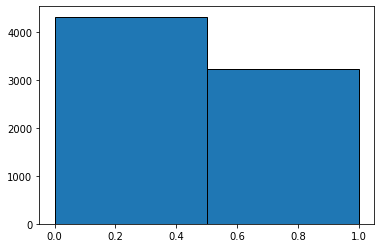

In [57]:
y_axis = df["target"]
plt.hist(y_axis, bins = 2, edgecolor = "black")

In [60]:
corpus[:10]

['ablaz bbcmtd wholesal market ablaz',
 'ablaz alway tri bring heavi metal rt',
 'ablaz africanbaz break news nigeria flag set ablaz aba',
 'ablaz cri set ablaz',
 'ablaz plu side look sky last night ablaz',
 'ablaz phdsquar mufc built much hype around new acquisit doubt set epl ablaz season',
 'ablaz inec offic abia set ablaz',
 'ablaz barbado bridgetown jamaica two car set ablaz santa cruz head st elizabeth polic superintend',
 'ablaz ablaz lord',
 'ablaz check http co tj zjin http co lxtjc kl nsfw']

In [92]:
text_vect = TfidfVectorizer()
text_vect.fit(corpus)
transformed = text_vect.transform(corpus)

In [93]:
transformed.shape

(7552, 13741)

## TRAIN AND TEST SPLIT OF DATA AND USING SVM CLASSIFIER

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(transformed, Y, test_size = 0.2, random_state=0)

In [106]:
classifier = SVC(kernel= "linear", probability=True)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [107]:
y_pre = classifier.predict(X_test)

In [108]:
accuracy_score(y_pre, Y_test)

0.8041032428855063

In [109]:
confusion_matrix(y_pre, Y_test)

array([[770, 208],
       [ 88, 445]], dtype=int64)